<a href="https://colab.research.google.com/github/albertopolini/Advanced-Machine-Learning/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Algebra operations
import numpy as np
# Dataframe manipulations
import pandas as pd

# Scalers, classification measures, oversampling tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Keras imports
from keras.layers import LeakyReLU
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils

# Tensorflow imports
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras import regularizers
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
class DataLoader:

  '''
  class to load the data from a folder

  methods: 
    get_datasets: return the loaded datasets
    drop_columns: drop a list of columns from the dataset
    concatenate_dataset: concatenate X_train with y_train
  '''

  def __init__(self, folder_path):
    self.folder_path = folder_path,

    self.X_train = pd.read_csv('{}/X_train.csv'.format(folder_path))
    self.y_train = pd.read_csv('{}/y_train.csv'.format(folder_path))
    self.X_test = pd.read_csv('{}/X_test.csv'.format(folder_path))

    self.X = None
    
    if self.X is None:
      self.concatenate_dataset()

  
  def get_datasets (self):
    return self.X, self.X_test 

  def drop_columns(self, columns):
    self.X_train = self.X_train.drop(columns, axis=1)
    self.X_test = self.X_test.drop(columns, axis=1)

    return self.X_train, self.X_test


  def concatenate_dataset(self):
    self.X = pd.merge(self.X_train, self.y_train, on='ID')
    self.X.drop(['ID'], axis=1, inplace=True)



In [ ]:
# Loading the data 
dataloader = DataLoader(folder_path='.')

In [ ]:
# Getting X and X_test datasets (X is the concatenation of X_train and y_train)
X, X_test = dataloader.get_datasets()

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.0,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,0
1,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.0,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0,0
2,180000.0,2,5,1,44,0,0,-1,-1,-1,-1,20916.0,0.0,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0,0
3,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.0,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,0
4,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.0,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,0


In [ ]:
X.shape

(24000, 24)

# Exploratory data analysis



Amount of missing values for each column:

 LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


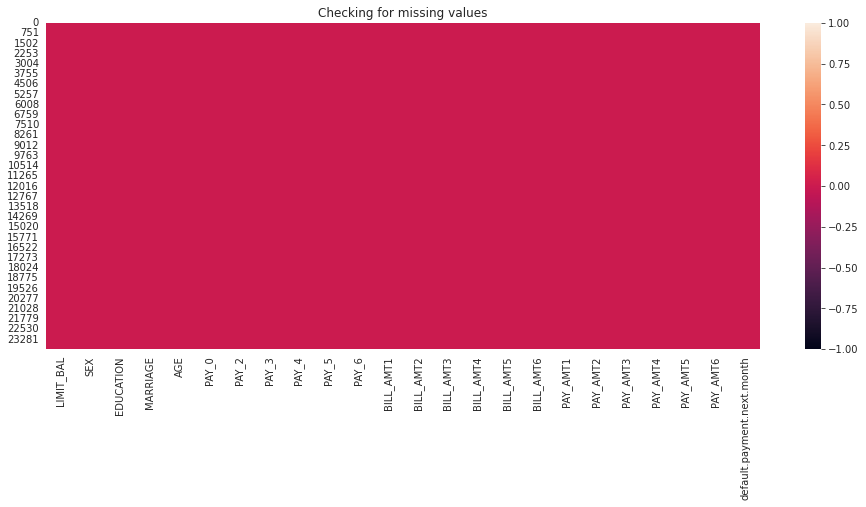

In [ ]:
# Checking for missing data

print("Amount of missing values for each column:\n\n",X.isna().sum())

plt.figure(figsize=(16, 6))
sns.heatmap(X.isna(), vmin=-1, vmax=1)
plt.title("Checking for missing values")
plt.show()

There's no missing data in the dataset

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   24000 non-null  float64
 1   SEX                         24000 non-null  int64  
 2   EDUCATION                   24000 non-null  int64  
 3   MARRIAGE                    24000 non-null  int64  
 4   AGE                         24000 non-null  int64  
 5   PAY_0                       24000 non-null  int64  
 6   PAY_2                       24000 non-null  int64  
 7   PAY_3                       24000 non-null  int64  
 8   PAY_4                       24000 non-null  int64  
 9   PAY_5                       24000 non-null  int64  
 10  PAY_6                       24000 non-null  int64  
 11  BILL_AMT1                   24000 non-null  float64
 12  BILL_AMT2                   24000 non-null  float64
 13  BILL_AMT3                   240

In [ ]:
categorical_columns = ['SEX',
                       'EDUCATION',
                       'MARRIAGE',
                       'PAY_0',
                       'PAY_2',
                       'PAY_3',
                       'PAY_4',
                       'PAY_5',
                       'PAY_6',
                       'default.payment.next.month'
                       ]

# Informations about the categorical columns
X[categorical_columns].astype(np.str).describe().T

,count,unique,top,freq
SEX,24000,2,2,14518
EDUCATION,24000,7,2,11186
MARRIAGE,24000,4,2,12747
PAY_0,24000,11,0,11783
PAY_2,24000,11,0,12569
PAY_3,24000,11,0,12618
PAY_4,24000,11,0,13184
PAY_5,24000,10,0,13587
PAY_6,24000,10,0,13003
default.payment.next.month,24000,2,0,18677


In [ ]:
# Informations about the numerical attributes

X.drop(categorical_columns,axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,24000.0,167226.653333,129734.959196,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,24000.0,35.494375,9.235160,21.0,28.00,34.0,42.00,79.0
BILL_AMT1,24000.0,50927.468417,73400.840274,-165580.0,3537.00,22321.5,66377.00,964511.0
BILL_AMT2,24000.0,48914.770500,70923.493353,-69777.0,2989.75,21140.5,63035.25,983931.0
BILL_AMT3,24000.0,46757.082125,69265.058844,-157264.0,2699.50,20050.0,59529.25,1664089.0
BILL_AMT4,24000.0,43013.532167,64069.494705,-170000.0,2329.00,19010.0,53927.75,891586.0
BILL_AMT5,24000.0,40150.333000,60635.882129,-81334.0,1763.00,18085.0,50007.50,927171.0
BILL_AMT6,24000.0,38763.540458,59281.986863,-209051.0,1271.75,17108.5,49101.75,961664.0
PAY_AMT1,24000.0,5670.826542,17084.401034,0.0,1000.00,2100.0,5005.00,873552.0
PAY_AMT2,24000.0,5961.100833,24284.119893,0.0,861.50,2007.0,5000.00,1684259.0


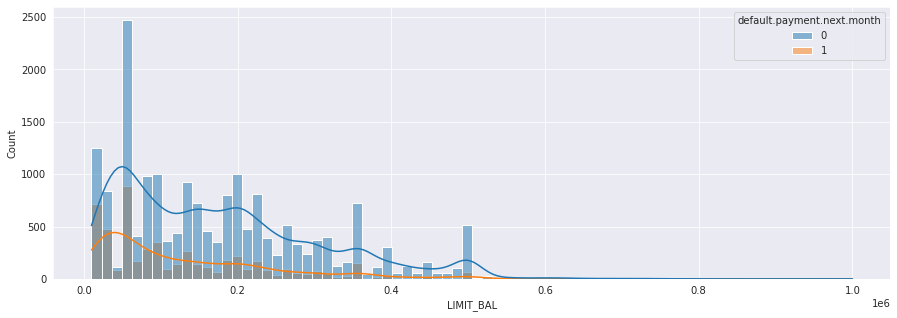

In [ ]:
# Distribution of LIMIT_BAL

plt.figure(figsize=(15,5))
sns.histplot(data=X, x='LIMIT_BAL', hue='default.payment.next.month', kde=True)

The majority of the distribution is under 200000

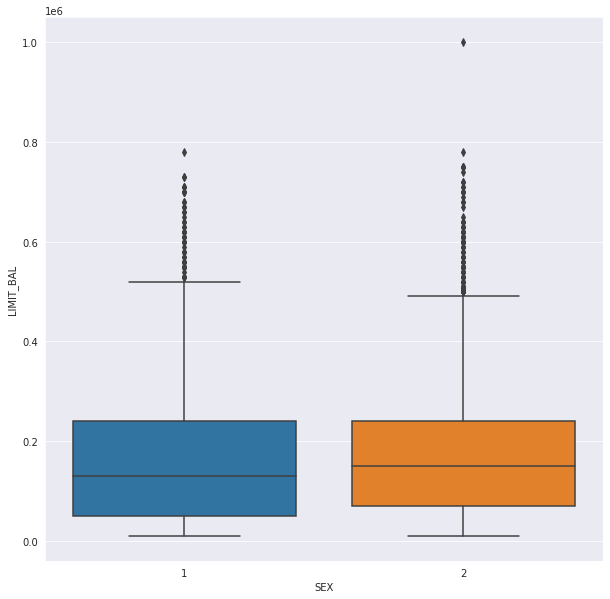

In [ ]:
# How much does the credit limit depends on sex?

plt.figure(figsize=(10,10))
sns.boxplot(x='SEX', y='LIMIT_BAL', data=X)

The credit limit seems to be balanced between the two classes

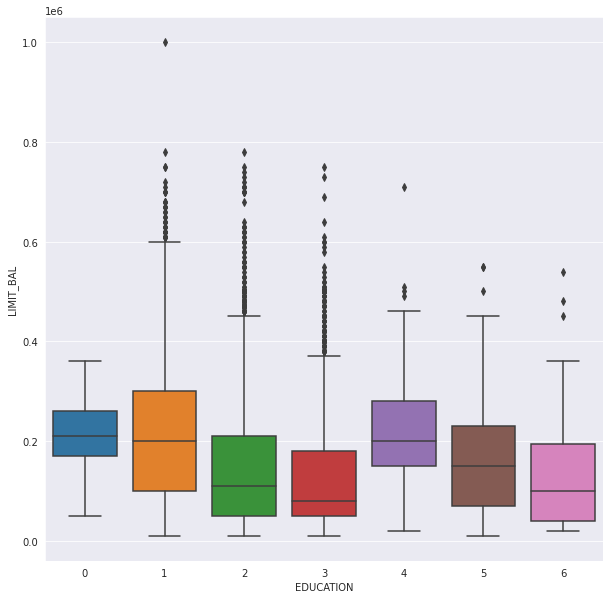

In [ ]:
# How much does the credit limit depends on Education?

plt.figure(figsize=(10,10))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=X)

In [ ]:
# There is a class 0 in education

# 10 records
X[X['EDUCATION'] == 0]

# Let's remove those records
X = X[X['EDUCATION'] != 0]
X[X['EDUCATION'] == 0]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


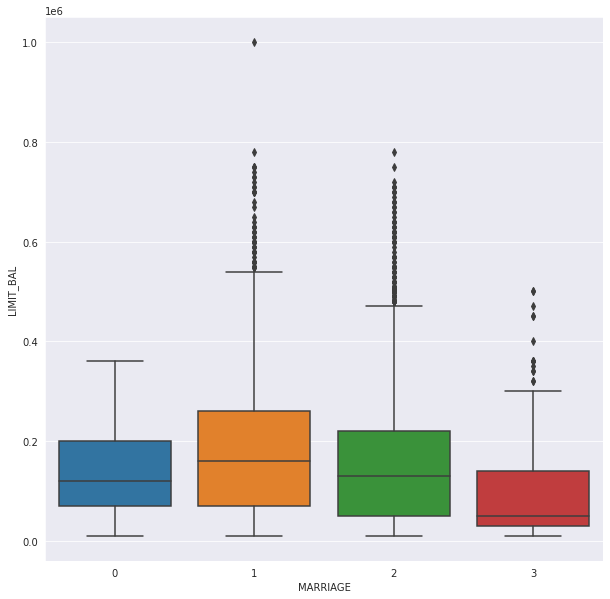

In [ ]:
# How much does the credit limit depends on MARRIAGE?

plt.figure(figsize=(10,10))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=X)

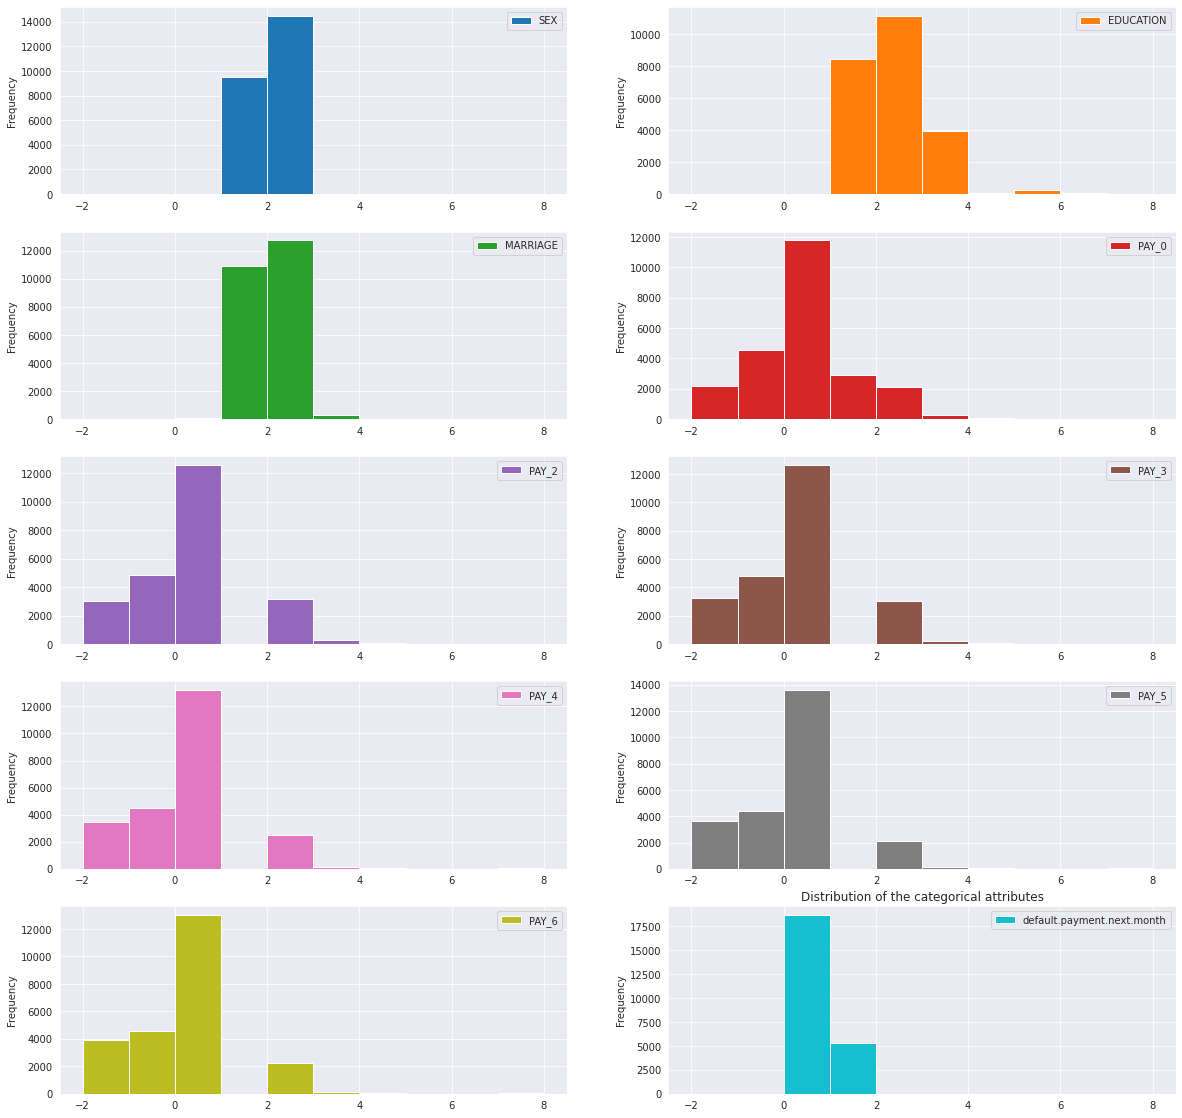

In [ ]:
# Distributions

# Categorical features

X[categorical_columns].plot.hist(subplots=True, legend=True, layout=(5,2), figsize=(20,20), sharex=False)
plt.title('Distribution of the categorical attributes')
plt.show()

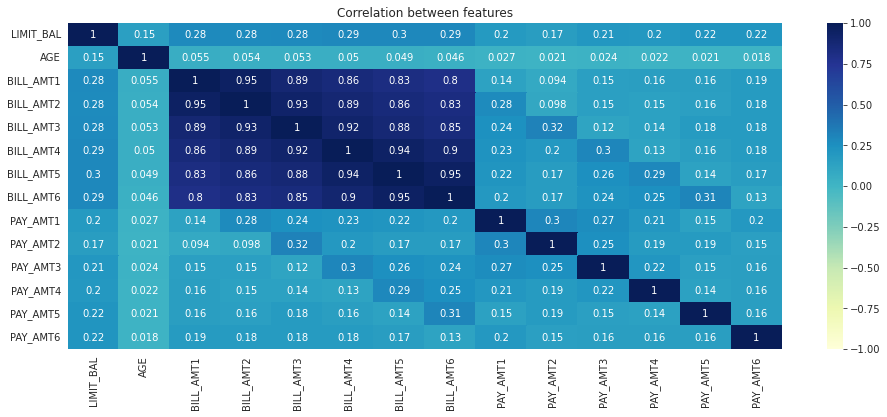

In [ ]:
# Check for correlated features

corr = X.drop(categorical_columns,axis=1).corr()

plt.figure(figsize=(16, 6))

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='YlGnBu')
plt.title("Correlation between features")
plt.show()

BILL_AMT features are highly correlated to each other

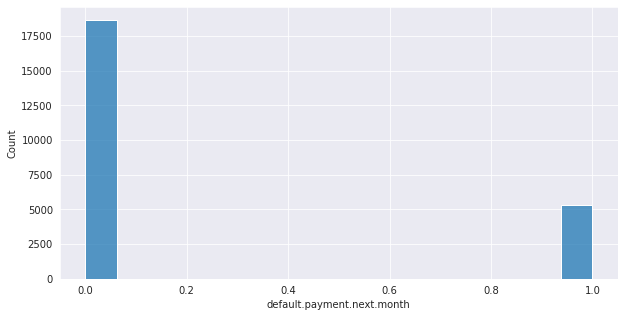

In [ ]:
# Imbalanced classes?

plt.figure(figsize=(10,5))
sns.histplot(data=X, x='default.payment.next.month')

In [ ]:
# The dataset is not imbalanced

print('Percentage of positive class records: {}%'.format(
    np.round(len(X[X['default.payment.next.month'] == 1]) / len(X)*100)))

Percentage of positive class records: 22.0%


# Utils Functions

In [ ]:
def encode_categorical(dataset, categorical_columns, remove_a_dummy=True):

    '''
      inputs:
        dataset: type dataframe
        categorical_columns: type list
        remove_a_dummy: bool

      output: 
        dataset: type dataframe
      
      description:
        function to transform categorical attributes into dummy variables
    '''

    for column in categorical_columns:

      if remove_a_dummy:
        
        new_columns = pd.get_dummies(dataset[column], prefix=column).drop(['{}_{}'.format(column, dataset[column].max())], axis = 1)
        dataset.drop([column], axis=1, inplace=True)
        dataset = pd.concat((dataset, new_columns), axis=1)

      else:
        new_columns = pd.get_dummies(dataset[column], prefix=column)
        dataset = pd.concat((dataset, new_columns), axis=1)

    return dataset

In [ ]:
def normalize(xtrain, ytrain, xval, yval):

  '''
    input: xtrain, ytrain, xval, yval: type dataframe
    output xtrain, ytrain, xval, yval: type np.array

    Description:
      Function to normalize the numeric features

  '''

  
  if REMOVE_CORRELATED_FEATURES:
    # Without correlated features
    continous_columns = ['LIMIT_BAL','AGE','BILL_AMT1', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
  else:
    # With correlated features
    continous_columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']


  scaler = MinMaxScaler()

  xtrain_countinous = scaler.fit_transform(xtrain[continous_columns])
  xval_countinous = scaler.transform(xval[continous_columns])

  xtrain_categorical = xtrain.drop(continous_columns, axis = 1)
  xval_categorical = xval.drop(continous_columns, axis = 1)

  if REMOVE_CATEGORICAL:
    print("\n Removing categorical features [\u2705]")
    xtrain = xtrain_countinous
    xval = xval_countinous

  else:
    xtrain = np.concatenate((xtrain_countinous, np.array(xtrain_categorical)),axis=1)
    xval = np.concatenate((xval_countinous, np.array(xval_categorical)),axis=1)

  return xtrain, ytrain, xval, yval, scaler


In [ ]:
def undersample(dataset):

    '''
      input: dataset: type dataframe
      output: dateset: type dataframe

      Description:
        Function to perform undersampling
    '''

    positive_class = len(dataset[dataset['default.payment.next.month'] == 1])
    df_negative = dataset[dataset['default.payment.next.month'] == 0].sample(positive_class, random_state=1)
    df_positive = dataset[dataset['default.payment.next.month'] == 1]

    return pd.concat((df_positive, df_negative), axis=0)

In [ ]:
def oversample(dataset):

  '''
    input: dataset: type dataframe
    output: dateset: type dataframe

    Description:
      Function to perform oversampling
  '''  

  X_columns = dataset.drop(['default.payment.next.month'], axis=1).columns
  y_column = ['default.payment.next.month']

  oversample = SMOTE(random_state=1234)
  features, target = oversample.fit_resample(dataset.drop(['default.payment.next.month'], axis=1), dataset['default.payment.next.month'])
  features = pd.DataFrame(features, columns=X_columns)
  target = pd.DataFrame(target, columns=y_column)

  return pd.concat((features, target), axis = 1)

In [ ]:
def plot_history(network_history):

    '''
      input: network_history: type list

      Description:
        Function to plot loss and accuracy of a model throught the training process
    '''

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


In [ ]:
def treshold(x,t):

  '''
    input: x, t: type number
    output: 0,1

    Description:
      Function to compute the treshold 
  ''' 

  if x < t:
    return 0
  else:
    return 1


def find_treshold(t, model, ensamble=False):

  '''
    input: 
      t: type number,
      model: type: neural network model,
      ensample: bool
    output: 
      f-score: type str
      

    Description:
      Function to find the best treshold according to f1-measure
  ''' 

  if ensamble:
    predictionsD = [[treshold(p,t) for p in model.predict(xtrain)] for model in models]
    predictionsD = np.array(predictionsD)
    summed = np.sum(predictionsD, axis=0)
    predictionsD = [1  if p>=1 else 0 for p in summed]

  else:
    predictionsD = [treshold(p,t) for p in model.predict(xtrain)]


  return  f1_score(ytrain,predictionsD)
  #return classification_report(ytrain,predictionsD, output_dict=True)['macro avg']['f1-score']

# Configurations

In [ ]:
# Configurations
CREATE_DUMMY = False
REMOVE_A_DUMMY = False
UNDERSAMPLE = False
OVERSAMPLE = False
REMOVE_CORRELATED_FEATURES = False
REMOVE_CATEGORICAL = False
NORMALIZE = False


correlated_columns = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
categorical_columns = [
                       'SEX',
                       'EDUCATION',
                       'MARRIAGE',
                       'PAY_0',
                       'PAY_2',
                       'PAY_3',
                       'PAY_4',
                       'PAY_5',
                       'PAY_6',
                       ]

columns_to_delete = ['PAY_5_8', 'PAY_4_8', 'PAY_2_5', 'PAY_6_8', 'PAY_0_6', 'PAY_2_8']

def setup(dataset):

  '''
    input: 
      dataset: type dataframe
    output: 
      dataset: type dataset

    Description:
      Function to compute multiple operations on the dataset
  ''' 

  state_dummy = state_undersample = state_correlated = state_oversample = '\u274C'

  print("Dataset shape before setup: ", dataset.shape)
  
  if CREATE_DUMMY:
    state_dummy = '\u2705'
    dataset = encode_categorical(dataset, categorical_columns=categorical_columns, remove_a_dummy=REMOVE_A_DUMMY)

    dataset.drop(columns_to_delete, axis=1, inplace=True)

  if UNDERSAMPLE:
    state_undersample = '\u2705'
    dataset = undersample(dataset=dataset)
  
  if OVERSAMPLE:
    state_oversample = '\u2705'
    

  if REMOVE_CORRELATED_FEATURES:
    state_correlated = '\u2705'
    dataset.drop(correlated_columns, axis=1, inplace=True)
  
  print("\nDUMMY VARIABLES [{}]".format(state_dummy))
  print("UNDERSAMPLE [{}]".format(state_undersample))
  print("OVERSAMPLE [{}]".format(state_oversample))
  print("CORRELATED FEATURES REMOVED [{}]\n".format(state_correlated))

  print("Dataset shape after setup: ", dataset.shape)
  
  return dataset


def create_partitions(dataset, valid_size = .1):

  '''
    input: 
      dataset: type dataframe
      valid_size: type number
    output: 
      xtrain, ytrain, xval, yval: type np.array

    Description:
      Function to partition and normalize the dataset
  ''' 

  X_train, y_train = dataset.drop(['default.payment.next.month'], axis = 1), dataset['default.payment.next.month']
  xtrain, xval, ytrain, yval = train_test_split(X_train, y_train, test_size=valid_size, random_state=42 )
  
  train_columns = xtrain.columns
  target_column = ['default.payment.next.month']

  if OVERSAMPLE:

    oversampler = SMOTE(random_state=1234, sampling_strategy=0.5)
    xtrain, ytrain = oversampler.fit_resample(xtrain,ytrain)

    xtrain = pd.DataFrame(xtrain, columns=train_columns)
    ytrain = pd.DataFrame(ytrain, columns=target_column)

  ytrain = np.array(ytrain)
  yval=np.array(yval)

  print("\nRECAP\n")

  print("Size of train set: {}".format(xtrain.shape))
  print("Size of validation set: {}".format(xval.shape))  

  print("Rare variable frequency in Training set: {}%".format(np.round((np.sum(ytrain)/len(ytrain))*100)))
  print("Rare variable frequency in Validation set: {}%".format(np.round((np.sum(yval)/len(yval))*100)))

  print("\nTraining dataset: \n", xtrain.head())
  print("\nValidation dataset: \n", xval.head())


  xtrain = xtrain.astype("float32")
  ytrain = ytrain.astype("float32")
  xval = xval.astype("float32")
  yval = yval.astype("float32")

  if NORMALIZE:

    print("\nNormalization [\u2705]")

    xtrain, ytrain, xval, yval, scaler = normalize(xtrain, ytrain, xval, yval)

    print("Normalized Training set: \n", xtrain)
    print("Normalized Validation set: \n", xval)

  return xtrain, ytrain, xval, yval, scaler



In [ ]:
status = {'True': '\u2705', 'False':'\u274C'}

# Neural network models

### Model 1


In [ ]:
dataset = X.copy()

## Configuration
CREATE_DUMMY = True
REMOVE_A_DUMMY = False
UNDERSAMPLE = False
OVERSAMPLE = False
REMOVE_CORRELATED_FEATURES = False
REMOVE_CATEGORICAL = False
NORMALIZE = True

config = {'Dummy': status[str(CREATE_DUMMY)], 'Undersample': status[str(UNDERSAMPLE)], 'Oversample': status[str(OVERSAMPLE)], 'Correlated features removed': status[str(REMOVE_CORRELATED_FEATURES)]}


X1 = setup(dataset)
xtrain, ytrain, xval, yval, scaler = create_partitions(dataset = X1, valid_size=0.2)

Dataset shape before setup:  (23990, 24)

DUMMY VARIABLES [✅]
UNDERSAMPLE [❌]
OVERSAMPLE [❌]
CORRELATED FEATURES REMOVED [❌]

Dataset shape after setup:  (23990, 94)

RECAP

Size of train set: (19192, 93)
Size of validation set: (4798, 93)
Rare variable frequency in Training set: 22.0%
Rare variable frequency in Validation set: 22.0%

Training dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
22998    50000.0    1          2         2  ...        0        0        0        0
21577   200000.0    1          1         2  ...        0        0        0        0
23533   170000.0    2          3         2  ...        0        0        0        0
12387   220000.0    1          1         2  ...        0        0        0        0
3585    110000.0    2          2         2  ...        0        0        0        0

[5 rows x 93 columns]

Validation dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
17123    

**After some parameter tuning i decided to build a model with 3 hidden layers**:

\\

1. First hidden layer: $\frac{2}{3}\text{input dim} + \text{output dim}$ neurons, activation: **Relu**

\\

2. Second hidden layer: $(\frac{2}{3}\text{input dim})/ 4$ neurons, activation: **Relu**

\\

3. Third hidden layer: $(\frac{2}{3}\text{input dim}) / 8 $ neurons, activation: **Relu**

\\

Output layer: $1$ neuron, activation: **Sigmoid**

\\

For this model i used an **SGD** optimizer a **Binary crossentropy** loss

I chose this architecture after a series of attempts. I noticed that the performances of the model, however, do not change much by changing the number of neurons and hidden layers.

In [ ]:
dims = xtrain.shape[1]

nb_classes = 2

initializer = tf.keras.initializers.GlorotUniform(seed=1234)

model1 = Sequential()

model1.add(Dense((2*dims//3) + 1, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer))
model1.add(Dense((2*dims//3)//4, activation = 'relu', kernel_initializer=initializer))
model1.add(Dense((2*dims//3)//16, activation = 'relu', kernel_initializer=initializer))


model1.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer))


model1.compile(optimizer='sgd', loss="binary_crossentropy", metrics=["accuracy"] )

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 63)                5922      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 6,934
Trainable params: 6,934
Non-trainable params: 0
_________________________________________________________________


A batch size of 128 seems to bring the best results. I also tried a batch size of 64 and 256.

In [ ]:
n_epochs = 50
history = model1.fit(xtrain,ytrain, batch_size=128, epochs=n_epochs, validation_data=(xval, yval))

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 0.5504 - accuracy: 0.7490 - val_loss: 0.4781 - val_accuracy: 0.8016
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8043 - val_loss: 0.4604 - val_accuracy: 0.8070
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8091 - val_loss: 0.4553 - val_accuracy: 0.8110
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8106 - val_loss: 0.4530 - val_accuracy: 0.8120
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8121 - val_loss: 0.4514 - val_accuracy: 0.8143
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8137 - val_loss: 0.4506 - val_accuracy: 0.8145
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8146 - val_loss: 0.4498 - val_accuracy: 0.8139
Epoch 

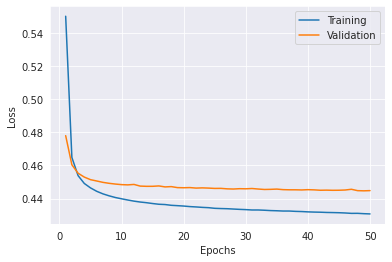

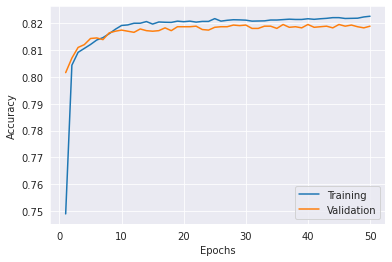

In [ ]:
x_plot = list(range(1,n_epochs+1))
plot_history(history)

The plot of the loss shows that we might have a bit of overfit for the last training epochs

In [ ]:
# A treshold of 0.5 is really the best treshold? 
## Finding the treshold that maximizes the f-measure in the training set


acc = []

tresholds = np.linspace(0,1,30)


for t in tresholds:
  acc.append(find_treshold(t, model=model1, ensamble=False))

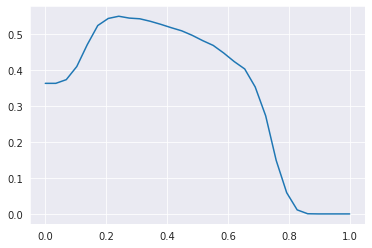

In [ ]:
# F-measure in the training set with respect of the treshold
plt.plot(tresholds,acc)

In [ ]:
best_treshold = tresholds[np.argmax(acc)]
best_treshold

0.24137931034482757

The treshold that maximizes the f-measure is about 0.34

In [ ]:
# Generating the predictions

predictions1 = [treshold(p,best_treshold) for p in model1.predict(xval)]

In [ ]:
# Classification report
print(classification_report(yval,predictions1))
print(f1_score(yval, predictions1))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      3729
         1.0       0.50      0.55      0.52      1069

    accuracy                           0.78      4798
   macro avg       0.68      0.70      0.69      4798
weighted avg       0.79      0.78      0.78      4798

0.523489932885906


The model has a total accuracy of 78%, and a macro avg score of 0.52

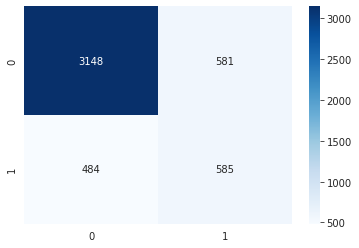

In [ ]:
# Confusion matrix

sns.heatmap(confusion_matrix(yval, predictions1), annot=True, cmap='Blues', fmt='.0f')

In [ ]:
report_model1 = classification_report(yval,predictions1, output_dict=True)
report_model1 = list((report_model1['accuracy'], report_model1['weighted avg']['f1-score'], report_model1['macro avg']['f1-score'],f1_score(yval, predictions1),
                      config['Dummy'], config['Undersample'], config['Oversample'], config['Correlated features removed']))

### Model 2

In [ ]:
dataset = X.copy()
## Configuration
CREATE_DUMMY = True
REMOVE_A_DUMMY = False
UNDERSAMPLE = False
OVERSAMPLE =  True
REMOVE_CORRELATED_FEATURES = False
REMOVE_CATEGORICAL = False
NORMALIZE = True

config = {'Dummy': status[str(CREATE_DUMMY)], 'Undersample': status[str(UNDERSAMPLE)], 'Oversample': status[str(OVERSAMPLE)], 'Correlated features removed': status[str(REMOVE_CORRELATED_FEATURES)]}


X2 = setup(dataset)

xtrain, ytrain, xval, yval, scaler = create_partitions(dataset = X2, valid_size=0.2)

Dataset shape before setup:  (23990, 24)

DUMMY VARIABLES [✅]
UNDERSAMPLE [❌]
OVERSAMPLE [✅]
CORRELATED FEATURES REMOVED [❌]

Dataset shape after setup:  (23990, 94)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



RECAP

Size of train set: (22407, 93)
Size of validation set: (4798, 93)
Rare variable frequency in Training set: 33.0%
Rare variable frequency in Validation set: 22.0%

Training dataset: 
    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
0    50000.0  1.0        2.0       2.0  ...      0.0      0.0      0.0      0.0
1   200000.0  1.0        1.0       2.0  ...      0.0      0.0      0.0      0.0
2   170000.0  2.0        3.0       2.0  ...      0.0      0.0      0.0      0.0
3   220000.0  1.0        1.0       2.0  ...      0.0      0.0      0.0      0.0
4   110000.0  2.0        2.0       2.0  ...      0.0      0.0      0.0      0.0

[5 rows x 93 columns]

Validation dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
17123    20000.0    1          2         1  ...        0        0        0        0
20289   240000.0    2          2         1  ...        0        0        0        0
4151    100000.0    2          

This model is identical to the previous one, except the last hidden layer.

In [ ]:
dims = xtrain.shape[1]

nb_classes = 2

initializer = tf.keras.initializers.GlorotUniform(seed=1234)

model2 = Sequential()

model2.add(Dense((2*dims//3) + 1, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer))
model2.add(Dense((2*dims//3)//4, activation = 'relu', kernel_initializer=initializer))
model2.add(Dense((2*dims//3)//8, activation = 'relu', kernel_initializer=initializer))

model2.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer))


model2.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=["accuracy"] )

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 63)                5922      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                960       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 8         
Total params: 7,002
Trainable params: 7,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 50
history = model2.fit(xtrain,ytrain, batch_size=128, epochs=n_epochs, validation_data=(xval, yval), shuffle=True)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 0.6732 - accuracy: 0.6278 - val_loss: 0.6275 - val_accuracy: 0.7226
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6661 - val_loss: 0.5903 - val_accuracy: 0.7793
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7029 - val_loss: 0.5604 - val_accuracy: 0.7974
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7222 - val_loss: 0.5383 - val_accuracy: 0.8049
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7345 - val_loss: 0.5233 - val_accuracy: 0.8080
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7437 - val_loss: 0.5105 - val_accuracy: 0.8112
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7474 - val_loss: 0.5009 - val_accuracy: 0.8112
Epoch 

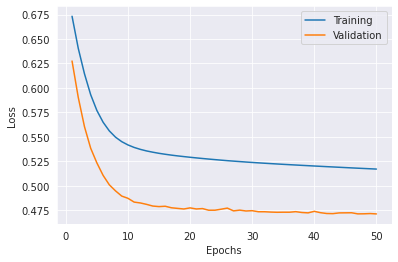

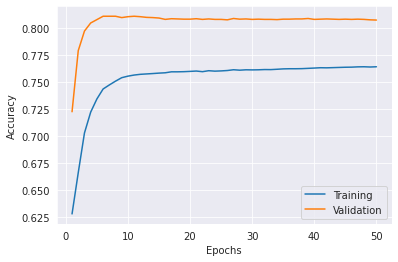

In [ ]:
x_plot = list(range(1,n_epochs+1))
plot_history(history)

In this case we have an overfitting behaviour, we shoud use some regularization techniques to solve this problem

In [ ]:
# Finding the best treshold

acc = []

tresholds = np.linspace(0,1,30)


for t in tresholds:
  acc.append(find_treshold(t, model=model2, ensamble=False))

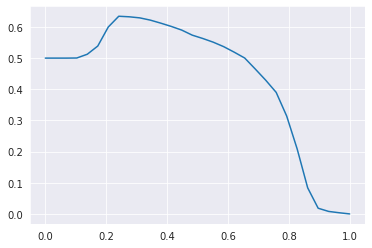

In [ ]:
plt.plot(tresholds,acc)

In [ ]:
best_treshold = tresholds[np.argmax(acc)]
best_treshold

0.24137931034482757

In [ ]:
predictions2 = [treshold(p,best_treshold) for p in model2.predict(xval)]

In [ ]:
print(classification_report(yval,predictions2))
print(f1_score(yval, predictions2))

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.80      3729
         1.0       0.41      0.62      0.50      1069

    accuracy                           0.72      4798
   macro avg       0.64      0.68      0.65      4798
weighted avg       0.77      0.72      0.74      4798

0.49682954121596423


The performances of this model are worst than the previous one

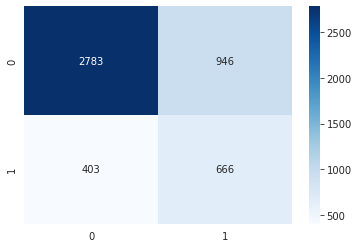

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(yval, predictions2), annot=True, cmap='Blues', fmt='.0f')

In [ ]:
report_model2 = classification_report(yval,predictions2, output_dict=True)
report_model2 = list((report_model2['accuracy'], report_model2['weighted avg']['f1-score'], report_model2['macro avg']['f1-score'],f1_score(yval, predictions2),
                      config['Dummy'], config['Undersample'], config['Oversample'], config['Correlated features removed']))

# Regularization

Can we increase the performances of the models throught regularization?

### Model L1

Here i'll try to use L1 regularization

In [ ]:
# First dataset 
dataset = X.copy()
## Configurations
CREATE_DUMMY = True
REMOVE_A_DUMMY = False
UNDERSAMPLE = False
OVERSAMPLE = False
REMOVE_CORRELATED_FEATURES = False
REMOVE_CATEGORICAL = False
NORMALIZE = True

config = {'Dummy': status[str(CREATE_DUMMY)], 'Undersample': status[str(UNDERSAMPLE)], 'Oversample': status[str(OVERSAMPLE)], 'Correlated features removed': status[str(REMOVE_CORRELATED_FEATURES)]}


XL1 = setup(dataset)
xtrain, ytrain, xval, yval,scaler = create_partitions(dataset = XL1, valid_size=0.2)

Dataset shape before setup:  (23990, 24)

DUMMY VARIABLES [✅]
UNDERSAMPLE [❌]
OVERSAMPLE [❌]
CORRELATED FEATURES REMOVED [❌]

Dataset shape after setup:  (23990, 94)

RECAP

Size of train set: (19192, 93)
Size of validation set: (4798, 93)
Rare variable frequency in Training set: 22.0%
Rare variable frequency in Validation set: 22.0%

Training dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
22998    50000.0    1          2         2  ...        0        0        0        0
21577   200000.0    1          1         2  ...        0        0        0        0
23533   170000.0    2          3         2  ...        0        0        0        0
12387   220000.0    1          1         2  ...        0        0        0        0
3585    110000.0    2          2         2  ...        0        0        0        0

[5 rows x 93 columns]

Validation dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
17123    

The model is the same of the ***model 2**

In [ ]:
dims = xtrain.shape[1]

nb_classes = 2

initializer = tf.keras.initializers.GlorotUniform(seed=1234)

modelL1 = Sequential()

modelL1.add(Dense((2*dims//3) + 1, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
modelL1.add(Dense((2*dims//3)//4, activation = 'relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
modelL1.add(Dense((2*dims//3)//8, activation = 'relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

modelL1.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))


modelL1.compile(optimizer='sgd', loss="binary_crossentropy", metrics=["accuracy"] )

In [ ]:
modelL1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 63)                5922      
_________________________________________________________________
dense_9 (Dense)              (None, 15)                960       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 7,002
Trainable params: 7,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 50
history = modelL1.fit(xtrain,ytrain, batch_size=128, epochs=n_epochs, validation_data=(xval, yval), shuffle=True)

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 7.3722 - accuracy: 0.7767 - val_loss: 6.8322 - val_accuracy: 0.8005
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 6.3650 - accuracy: 0.8043 - val_loss: 5.9063 - val_accuracy: 0.8101
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 5.4795 - accuracy: 0.8086 - val_loss: 5.0619 - val_accuracy: 0.8110
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 4.6737 - accuracy: 0.8097 - val_loss: 4.2955 - val_accuracy: 0.8101
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 3.9485 - accuracy: 0.8096 - val_loss: 3.6123 - val_accuracy: 0.8118
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 3.3022 - accuracy: 0.8096 - val_loss: 3.0035 - val_accuracy: 0.8101
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 2.7324 - accuracy: 0.8081 - val_loss: 2.4745 - val_accuracy: 0.8097
Epoch 

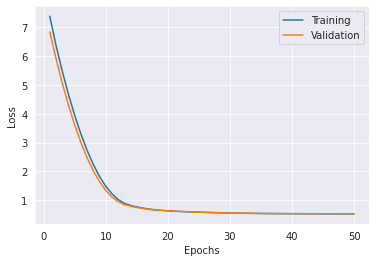

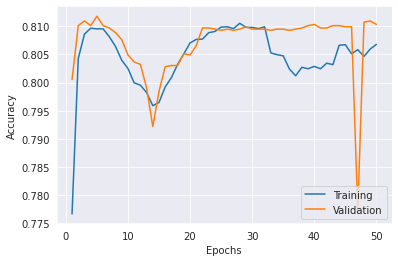

In [ ]:
x_plot = list(range(1,n_epochs+1))
plot_history(history)

The validation loss has the same behavior of the training loss.

In [ ]:
acc = []

tresholds = np.linspace(0,1,30)


for t in tresholds:
  acc.append(find_treshold(t, model=modelL1, ensamble=False))

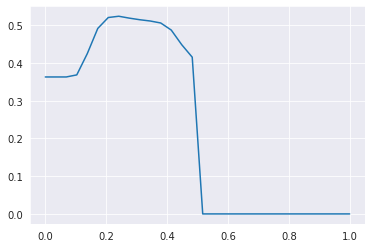

In [ ]:
plt.plot(tresholds,acc)

In [ ]:
best_treshold = tresholds[np.argmax(acc)]
best_treshold

0.24137931034482757

In [ ]:
predictionsL1 = [treshold(p,best_treshold) for p in modelL1.predict(xval)]

In [ ]:
print(classification_report(yval,predictionsL1))
print(f1_score(yval, predictionsL1))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      3729
         1.0       0.49      0.53      0.51      1069

    accuracy                           0.77      4798
   macro avg       0.68      0.69      0.68      4798
weighted avg       0.78      0.77      0.78      4798

0.5107913669064748


The f-measure is 0.7 while the accuracy is 0.81. The performances are comparable to the previous models

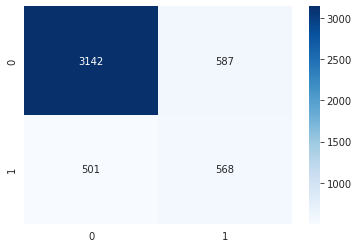

In [ ]:
sns.heatmap(confusion_matrix(yval, predictionsL1), annot=True, cmap='Blues', fmt='.0f')


In [ ]:
report_modelL1 = classification_report(yval,predictionsL1, output_dict=True)
report_modelL1 = list((report_modelL1['accuracy'], report_modelL1['weighted avg']['f1-score'], report_modelL1['macro avg']['f1-score'],f1_score(yval, predictionsL1),
                      config['Dummy'], config['Undersample'], config['Oversample'], config['Correlated features removed']))

### Model L2

L2 regularization

In [ ]:
# First dataset 
dataset = X.copy()
## Configurations
CREATE_DUMMY = True
REMOVE_A_DUMMY = False
UNDERSAMPLE = False
OVERSAMPLE = False
REMOVE_CORRELATED_FEATURES = False
REMOVE_CATEGORICAL = False
NORMALIZE = True


config = {'Dummy': status[str(CREATE_DUMMY)], 'Undersample': status[str(UNDERSAMPLE)], 'Oversample': status[str(OVERSAMPLE)], 'Correlated features removed': status[str(REMOVE_CORRELATED_FEATURES)]}


XL2 = setup(dataset)
xtrain, ytrain, xval, yval, scaler = create_partitions(dataset = XL2, valid_size=0.2)

Dataset shape before setup:  (23990, 24)

DUMMY VARIABLES [✅]
UNDERSAMPLE [❌]
OVERSAMPLE [❌]
CORRELATED FEATURES REMOVED [❌]

Dataset shape after setup:  (23990, 94)

RECAP

Size of train set: (19192, 93)
Size of validation set: (4798, 93)
Rare variable frequency in Training set: 22.0%
Rare variable frequency in Validation set: 22.0%

Training dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
22998    50000.0    1          2         2  ...        0        0        0        0
21577   200000.0    1          1         2  ...        0        0        0        0
23533   170000.0    2          3         2  ...        0        0        0        0
12387   220000.0    1          1         2  ...        0        0        0        0
3585    110000.0    2          2         2  ...        0        0        0        0

[5 rows x 93 columns]

Validation dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
17123    

In [ ]:
dims = xtrain.shape[1]

nb_classes = 2

initializer = tf.keras.initializers.GlorotUniform(seed=1234)

modelL2 = Sequential()

modelL2.add(Dense((2*dims//3) + 1, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
modelL2.add(Dense((2*dims//3)//4, activation = 'relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
modelL2.add(Dense((2*dims//3)//8, activation = 'relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

modelL2.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer))


modelL2.compile(optimizer='sgd', loss="binary_crossentropy", metrics=["accuracy"] )

In [ ]:
modelL2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 63)                5922      
_________________________________________________________________
dense_13 (Dense)             (None, 15)                960       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 8         
Total params: 7,002
Trainable params: 7,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 50
history = modelL2.fit(xtrain,ytrain, batch_size=128, epochs=n_epochs, validation_data=(xval, yval), shuffle=True)

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 1.5714 - accuracy: 0.7773 - val_loss: 1.4875 - val_accuracy: 0.8058
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 1.4512 - accuracy: 0.8087 - val_loss: 1.4201 - val_accuracy: 0.8114
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 1.3889 - accuracy: 0.8121 - val_loss: 1.3624 - val_accuracy: 0.8135
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 1.3328 - accuracy: 0.8131 - val_loss: 1.3091 - val_accuracy: 0.8135
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 1.2809 - accuracy: 0.8140 - val_loss: 1.2593 - val_accuracy: 0.8151
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 1.2322 - accuracy: 0.8151 - val_loss: 1.2124 - val_accuracy: 0.8158
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 1.1865 - accuracy: 0.8158 - val_loss: 1.1687 - val_accuracy: 0.8160
Epoch 

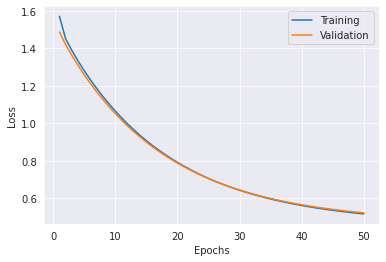

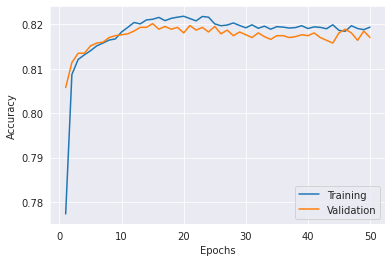

In [ ]:
x_plot = list(range(1,n_epochs+1))
plot_history(history)

The validation loss is equal to the validation loss, we shouldn't have any overfitting

In [ ]:
acc = []

tresholds = np.linspace(0,1,30)


for t in tresholds:
  acc.append(find_treshold(t, model=modelL2, ensamble=False))

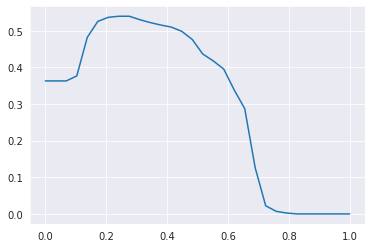

In [ ]:
plt.plot(tresholds,acc)

In [ ]:
best_treshold = tresholds[np.argmax(acc)]
best_treshold

0.27586206896551724

In [ ]:
predictionsL2 = [treshold(p,best_treshold) for p in modelL1.predict(xval)]

In [ ]:
print(classification_report(yval,predictionsL2))
print(f1_score(yval, predictionsL2))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3729
         1.0       0.52      0.51      0.51      1069

    accuracy                           0.78      4798
   macro avg       0.69      0.69      0.69      4798
weighted avg       0.78      0.78      0.78      4798

0.5143125293289534


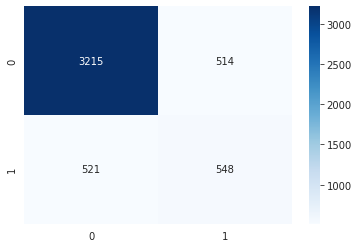

In [ ]:
sns.heatmap(confusion_matrix(yval, predictionsL2), annot=True, cmap='Blues', fmt='.0f')


In [ ]:
report_modelL2 = classification_report(yval,predictionsL2, output_dict=True)
report_modelL2 = list((report_modelL2['accuracy'], report_modelL2['weighted avg']['f1-score'], report_modelL2['macro avg']['f1-score'],f1_score(yval, predictionsL2),
                      config['Dummy'], config['Undersample'], config['Oversample'], config['Correlated features removed']))

### Dropout + Ensemble

In [ ]:
# First dataset 
dataset = X.copy()
## Configurations
CREATE_DUMMY = True
REMOVE_A_DUMMY = False
UNDERSAMPLE = False
OVERSAMPLE = False
REMOVE_CORRELATED_FEATURES = False
REMOVE_CATEGORICAL = False
NORMALIZE = True

config = {'Dummy': status[str(CREATE_DUMMY)], 'Undersample': status[str(UNDERSAMPLE)], 'Oversample': status[str(OVERSAMPLE)], 'Correlated features removed': status[str(REMOVE_CORRELATED_FEATURES)]}


XD = setup(dataset)
xtrain, ytrain, xval, yval, scaler = create_partitions(dataset = XD, valid_size=0.2)

Dataset shape before setup:  (23990, 24)

DUMMY VARIABLES [✅]
UNDERSAMPLE [❌]
OVERSAMPLE [❌]
CORRELATED FEATURES REMOVED [❌]

Dataset shape after setup:  (23990, 94)

RECAP

Size of train set: (19192, 93)
Size of validation set: (4798, 93)
Rare variable frequency in Training set: 22.0%
Rare variable frequency in Validation set: 22.0%

Training dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
22998    50000.0    1          2         2  ...        0        0        0        0
21577   200000.0    1          1         2  ...        0        0        0        0
23533   170000.0    2          3         2  ...        0        0        0        0
12387   220000.0    1          1         2  ...        0        0        0        0
3585    110000.0    2          2         2  ...        0        0        0        0

[5 rows x 93 columns]

Validation dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
17123    

**In this case i wanted to try an esamble model. I built 3 different neural networks with different numer of neurons and hidden layers and then i combined the previsions trought majority voting**

In [ ]:
dims = xtrain.shape[1]

nb_classes = 2

initializer = tf.keras.initializers.GlorotUniform(seed=1234)




modelD1 = Sequential()
modelD1.add(Dense((dims // 2) + 1, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer))
modelD1.add(Dropout(0.1))
modelD1.add(Dense((dims // 4), activation = 'relu', kernel_initializer=initializer))
modelD1.add(Dropout(0.1))
modelD1.add(Dense((dims // 8), input_shape=(dims,), activation = 'relu', kernel_initializer=initializer))
modelD1.add(Dropout(0.1))
modelD1.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer))
modelD1.compile(optimizer='sgd', loss="binary_crossentropy", metrics=["accuracy"] )

modelD2 = Sequential()

modelD2.add(Dense((dims // 2) + 1, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer))
modelD2.add(Dropout(0.1))
modelD2.add(Dense((dims // 2), activation = 'relu', kernel_initializer=initializer))
modelD2.add(Dropout(0.1))

modelD2.add(Dense((dims // 8), activation = 'relu', kernel_initializer=initializer))
modelD2.add(Dropout(0.1))
modelD2.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer))
modelD2.compile(optimizer='sgd', loss="binary_crossentropy", metrics=["accuracy"] )


modelD3 = Sequential()
modelD3.add(Dense(dims * 2, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer))
modelD3.add(Dropout(0.1))
modelD3.add(Dense((dims // 2), activation = 'relu', kernel_initializer=initializer))
modelD3.add(Dropout(0.1))
modelD3.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer))
modelD3.compile(optimizer='adagrad', loss="binary_crossentropy", metrics=["accuracy"] )






In [ ]:
print(modelD1.summary())
print(modelD2.summary())
print(modelD3.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 47)                4418      
_________________________________________________________________
dropout (Dropout)            (None, 47)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 23)                1104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 23)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 11)                264       
_________________________________________________________________
dropout_2 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [ ]:
n_epochs = 50
history1 = modelD1.fit(xtrain,ytrain, batch_size=128, epochs=n_epochs, validation_data=(xval, yval))
history2 = modelD2.fit(xtrain,ytrain, batch_size=128, epochs=n_epochs, validation_data=(xval, yval))
history3 = modelD3.fit(xtrain,ytrain, batch_size=64, epochs=n_epochs, validation_data=(xval, yval))

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 0.5425 - accuracy: 0.7730 - val_loss: 0.4858 - val_accuracy: 0.7897
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7940 - val_loss: 0.4653 - val_accuracy: 0.8028
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8008 - val_loss: 0.4579 - val_accuracy: 0.8076
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.8038 - val_loss: 0.4536 - val_accuracy: 0.8093
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8054 - val_loss: 0.4513 - val_accuracy: 0.8118
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8073 - val_loss: 0.4498 - val_accuracy: 0.8130
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8095 - val_loss: 0.4488 - val_accuracy: 0.8128
Epoch 

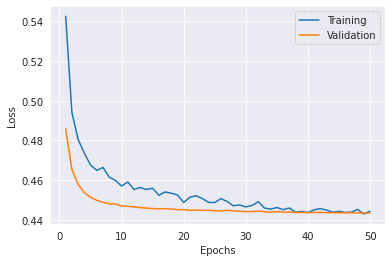

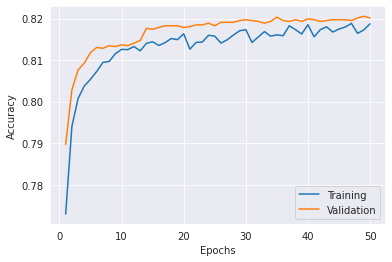

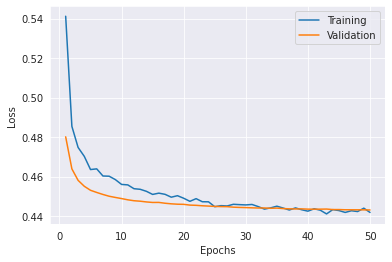

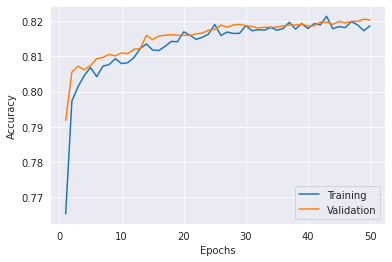

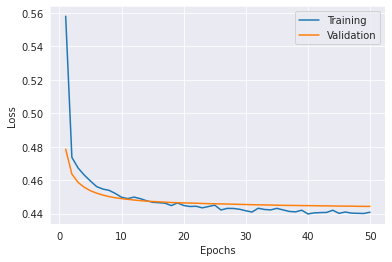

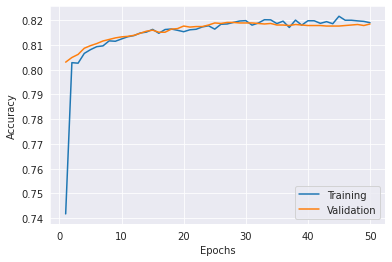

In [ ]:
x_plot = list(range(1,n_epochs+1))
plot_history(history1)
plot_history(history2)
plot_history(history3)

All the models seems to be well fitted

In [ ]:
# Combining the models
models = [modelD1, modelD2, modelD3]

In [ ]:
# Best treshold for the ensamble model on the training set
acc = []

tresholds = np.linspace(0,1,30)


for t in tresholds:
  acc.append(find_treshold(t, model=models, ensamble=True))

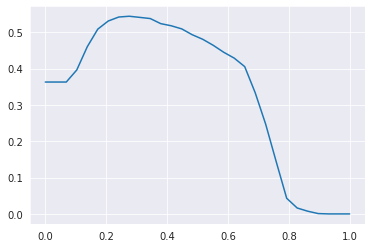

In [ ]:
plt.plot(tresholds,acc)

In [ ]:
best_treshold = tresholds[np.argmax(acc)]
print(best_treshold)

0.27586206896551724


In [ ]:
# Majority voting
predictionsD = [[treshold(p,best_treshold) for p in model.predict(xval)] for model in models]
predictionsD = np.array(predictionsD)

summed = np.sum(predictionsD, axis=0)

predictionsD = [1  if p>=1 else 0 for p in summed]

In [ ]:
print(classification_report(yval,predictionsD))
print(f1_score(yval, predictionsD))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      3729
         1.0       0.52      0.55      0.53      1069

    accuracy                           0.78      4798
   macro avg       0.69      0.70      0.70      4798
weighted avg       0.79      0.78      0.79      4798

0.5306678782371649


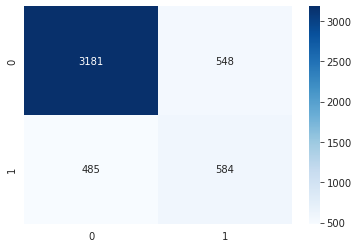

In [ ]:
sns.heatmap(confusion_matrix(yval, predictionsD), annot=True, cmap='Blues', fmt='.0f')

In [ ]:
report_modelD = classification_report(yval,predictionsD, output_dict=True)
report_modelD = list((report_modelD['accuracy'], report_modelD['weighted avg']['f1-score'], report_modelD['macro avg']['f1-score'],f1_score(yval, predictionsD),
                      config['Dummy'], config['Undersample'], config['Oversample'], config['Correlated features removed']))

### Early stopping

In [ ]:
# First dataset 
dataset = X.copy()
## Configurations
CREATE_DUMMY = True
REMOVE_A_DUMMY = False
UNDERSAMPLE = False
OVERSAMPLE = False
REMOVE_CORRELATED_FEATURES = False
REMOVE_CATEGORICAL = False
NORMALIZE = True

config = {'Dummy': status[str(CREATE_DUMMY)], 'Undersample': status[str(UNDERSAMPLE)], 'Oversample': status[str(OVERSAMPLE)], 'Correlated features removed': status[str(REMOVE_CORRELATED_FEATURES)]}


XE = setup(dataset)
xtrain, ytrain, xval, yval, scaler = create_partitions(dataset = XE, valid_size=0.2)

Dataset shape before setup:  (23990, 24)

DUMMY VARIABLES [✅]
UNDERSAMPLE [❌]
OVERSAMPLE [❌]
CORRELATED FEATURES REMOVED [❌]

Dataset shape after setup:  (23990, 94)

RECAP

Size of train set: (19192, 93)
Size of validation set: (4798, 93)
Rare variable frequency in Training set: 22.0%
Rare variable frequency in Validation set: 22.0%

Training dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
22998    50000.0    1          2         2  ...        0        0        0        0
21577   200000.0    1          1         2  ...        0        0        0        0
23533   170000.0    2          3         2  ...        0        0        0        0
12387   220000.0    1          1         2  ...        0        0        0        0
3585    110000.0    2          2         2  ...        0        0        0        0

[5 rows x 93 columns]

Validation dataset: 
        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7
17123    

In [ ]:
dims = xtrain.shape[1]

nb_classes = 2

initializer = tf.keras.initializers.GlorotUniform(seed=1234)

modelE = Sequential()

modelE.add(Dense((2*dims//3) + 1, input_shape=(dims,), activation = 'relu', kernel_initializer=initializer))
modelE.add(Dense((2*dims//3)//4, activation = 'relu', kernel_initializer=initializer))
modelE.add(Dense((2*dims//3)//8, activation = 'relu', kernel_initializer=initializer))
modelE.add(Dense(nb_classes - 1, activation="sigmoid", kernel_initializer=initializer))


modelE.compile(optimizer='adagrad', loss="binary_crossentropy", metrics=["accuracy"] )

In [ ]:
modelE.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 63)                5922      
_________________________________________________________________
dense_28 (Dense)             (None, 15)                960       
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 8         
Total params: 7,002
Trainable params: 7,002
Non-trainable params: 0
_________________________________________________________________


I'll try to run the model for 1000 epochs

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

fBestModel = 'best_model.h5' 

early_stop = EarlyStopping(monitor='val_loss', patience=15, min_delta = 0.0001, verbose=1, restore_best_weights=True) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

batch_size = 512
n_epochs = 1000
history = modelE.fit(xtrain, ytrain, validation_data = (xval, yval), epochs=n_epochs, 
          batch_size=batch_size, verbose=True, callbacks=[best_model, early_stop], shuffle=True)

Epoch 1/1000
38/38 [==============================] - 1s 7ms/step - loss: 0.6542 - accuracy: 0.6969 - val_loss: 0.6317 - val_accuracy: 0.7172
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7345 - val_loss: 0.5993 - val_accuracy: 0.7541
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.7678 - val_loss: 0.5741 - val_accuracy: 0.7722
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7756 - val_loss: 0.5544 - val_accuracy: 0.7764
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7788 - val_loss: 0.5389 - val_accuracy: 0.7772
Epoch 6/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.7805 - val_loss: 0.5253 - val_accuracy: 0.7789
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.7813 - val_loss: 0.5136 - val_accuracy: 0.7814
Epoch 

The model stopped after 497 epochs

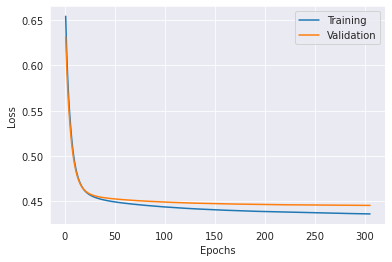

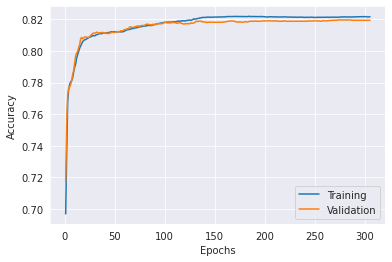

In [ ]:
x_plot = list(range(1,len(history.history['accuracy'])+1))
plot_history(history)

The model shows a very similar behaviour in both the training and validation. I think that we don't have any overfitting

In [ ]:
acc = []

tresholds = np.linspace(0,1,30)


for t in tresholds:
  acc.append(find_treshold(t, model=modelE, ensamble=False))

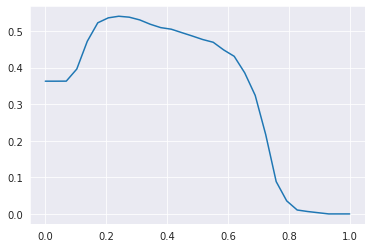

In [ ]:
plt.plot(tresholds,acc)

In [ ]:
best_treshold = tresholds[np.argmax(acc)]
best_treshold

0.24137931034482757

In [ ]:
predictionsE = [treshold(p,best_treshold) for p in modelE.predict(xval)]

In [ ]:
print(classification_report(yval,predictionsE))
print(f1_score(yval, predictionsE))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      3729
         1.0       0.52      0.54      0.53      1069

    accuracy                           0.79      4798
   macro avg       0.69      0.70      0.69      4798
weighted avg       0.79      0.79      0.79      4798

0.5282498851630685


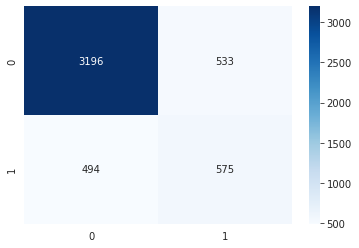

In [ ]:
sns.heatmap(confusion_matrix(yval, predictionsE), annot=True, cmap='Blues', fmt='.0f')

In [ ]:
report_modelE = classification_report(yval,predictionsE, output_dict=True)
report_modelE = list((report_modelE['accuracy'], report_modelE['weighted avg']['f1-score'], report_modelE['macro avg']['f1-score'],f1_score(yval, predictionsE),
                      config['Dummy'], config['Undersample'], config['Oversample'], config['Correlated features removed']))

# Evaluation

In [ ]:
metrics = {
    'Model 1': report_model1,
    'Model 2': report_model2,
    'Model L1': report_modelL1,
    'Model L2': report_modelL2,
    'Model Dropout & Ensamble': report_modelD,
    'Model Early Stopping': report_modelE
}

In [ ]:
metrics = pd.DataFrame.from_dict(metrics)
metrics.index = ["Accuracy", "F-measure weighted", "F-measure macro", "F-measure", "Dummy", "Undersample", "Oversample", "Correlated features removed"]
metrics = metrics.T

Here there's the recap of all the models

In [ ]:
metrics

,Accuracy,F-measure weighted,F-measure macro,F-measure,Dummy,Undersample,Oversample,Correlated features removed
Model 1,0.778033,0.781387,0.689404,0.52349,✅,❌,❌,❌
Model 2,0.718841,0.736275,0.650873,0.49683,✅,❌,✅,❌
Model L1,0.773239,0.7763,0.681603,0.510791,✅,❌,❌,❌
Model L2,0.784285,0.784032,0.687833,0.514313,✅,❌,❌,❌
Model Dropout & Ensamble,0.784702,0.786866,0.695489,0.530668,✅,❌,❌,❌
Model Early Stopping,0.785952,0.787307,0.694911,0.52825,✅,❌,❌,❌


In [ ]:
# Best by accuracy

pd.DataFrame(metrics.iloc[metrics['Accuracy'].astype("float32").argmax()])

,Model Early Stopping
Accuracy,0.785952
F-measure weighted,0.787307
F-measure macro,0.694911
F-measure,0.52825
Dummy,✅
Undersample,❌
Oversample,❌
Correlated features removed,❌


In [ ]:
# Best by f-measure weighted

pd.DataFrame(metrics.iloc[metrics['F-measure weighted'].astype("float32").argmax()])

,Model Early Stopping
Accuracy,0.785952
F-measure weighted,0.787307
F-measure macro,0.694911
F-measure,0.52825
Dummy,✅
Undersample,❌
Oversample,❌
Correlated features removed,❌


In [ ]:
# Best by f-measure macro

pd.DataFrame(metrics.iloc[metrics['F-measure macro'].astype("float32").argmax()])

,Model Dropout & Ensamble
Accuracy,0.784702
F-measure weighted,0.786866
F-measure macro,0.695489
F-measure,0.530668
Dummy,✅
Undersample,❌
Oversample,❌
Correlated features removed,❌


In [ ]:
# Best by f-measure

pd.DataFrame(metrics.iloc[metrics['F-measure'].astype("float32").argmax()])

,Model Dropout & Ensamble
Accuracy,0.784702
F-measure weighted,0.786866
F-measure macro,0.695489
F-measure,0.530668
Dummy,✅
Undersample,❌
Oversample,❌
Correlated features removed,❌


**The ensemble model has the best F-measure, for this reason i pick it as winner model**

# Predictions

In [ ]:
X_test.shape

(6000, 24)

In [ ]:
xtrain.shape

(19192, 93)

In [ ]:
X_test = encode_categorical(X_test, categorical_columns=categorical_columns, remove_a_dummy=False)

In [ ]:
X_test.shape

(6000, 95)

In [ ]:
X_test.drop(['ID','EDUCATION_0'], axis=1, inplace=True)

In [ ]:
X_test.shape

(6000, 93)

In [ ]:
# Normalizing the test set
continous_columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']


X_test_countinous = scaler.transform(X_test[continous_columns])
X_test_categorical = X_test.drop(continous_columns, axis = 1)
X_test = np.concatenate((X_test_countinous, np.array(X_test_categorical)),axis=1)

In [ ]:
X_test.shape

(6000, 93)

In [ ]:
treshold_ensemble = 0.276

test_predictions = [[treshold(p,treshold_ensemble) for p in model.predict(X_test)] for model in models]
test_predictions = np.array(test_predictions)

summed = np.sum(test_predictions, axis=0)

test_predictions = [1  if p>=1 else 0 for p in summed]

(array([4541.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1459.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

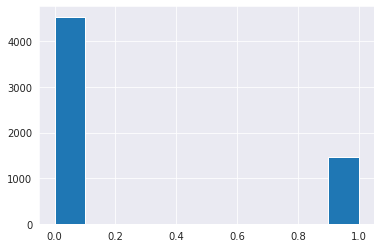

In [ ]:
plt.hist(test_predictions)

In [ ]:
with open("Alberto_Polini_789349_score2.txt", "w") as textfile:
  for element in test_predictions:
    textfile.write(str(element) + "\n")

In [ ]:
pd.read_csv('Alberto_Polini_789349_score2.txt', header=None)

,0
0,0
1,0
2,0
3,0
4,0
...,...
5995,0
5996,1
5997,0
5998,0
